In [2]:
%load_ext autoreload
%autoreload 2

# Imports

In [3]:
from evoscaper.scripts.init_from_hpos import init_from_hpos
from evoscaper.utils.math import arrayise
from evoscaper.utils.preprocess import make_datetime_str
from bioreaction.misc.misc import load_json_as_dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import jax

In [4]:
top_write_dir = os.path.join('data', '05_hidden_size', make_datetime_str())
os.makedirs(top_write_dir, exist_ok=True)
df_hpos = pd.DataFrame(load_json_as_dict(
    'data/2025_01_13__16_31_26/df_hpos_main.json'))
df_hpos['mi_mean'] = np.nan
df_hpos.loc[df_hpos['run_successful'], 'mi_mean'] = df_hpos[df_hpos['run_successful']]['mutual_information_conditionality'].apply(np.array).apply(np.mean)


def load_params(fn_saves):
    saves_loaded = load_json_as_dict(fn_saves)
    params = saves_loaded[str(list(saves_loaded.keys())[-1])]['params']
    params = arrayise(params)
    return params



In [ ]:
hpos = df_hpos.iloc[0]
(
    rng, rng_model, rng_dataset,
    config_norm_x, config_norm_y, config_filter, config_optimisation, config_dataset, config_training, config_model,
    data, x_cols, df,
    x, cond, y, x_train, cond_train, y_train, x_val, cond_val, y_val,
    total_ds, n_batches, BATCH_SIZE, x_datanormaliser, x_methods_preprocessing, y_datanormaliser, y_methods_preprocessing,
    _, 
    encoder, decoder, model, h2mu, h2logvar, reparam
) = init_from_hpos(hpos)


params = load_params(hpos['filename_saved_model'])

h_all = encoder(params, rng, np.concatenate([x, cond], axis=-1))
h_all = h_all.reshape(np.prod(h_all.shape[:-1]), -1)
cond_rev_all = y_datanormaliser.create_chain_preprocessor_inverse(y_methods_preprocessing)(cond, col=config_dataset.objective_col[0]).reshape(np.prod(cond.shape[:-1]), -1).squeeze()
x_rev_all = x_datanormaliser.create_chain_preprocessor_inverse(x_methods_preprocessing)(x).reshape(np.prod(x.shape[:-1]), -1).squeeze()

Text(0.5, 1.0, 'Mutual information between hidden z and conditional input')

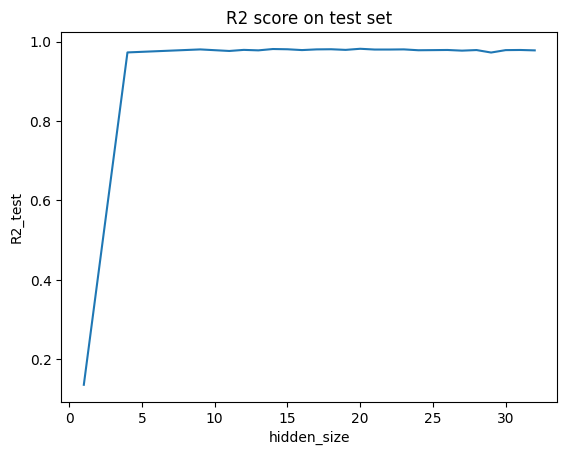

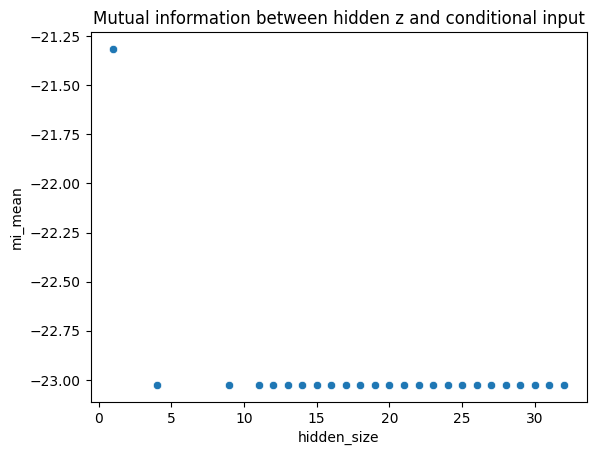

In [40]:
d = df_hpos[df_hpos['run_successful']]

sns.lineplot(d, x='hidden_size', y='R2_test')
plt.title('R2 score on test set')
plt.figure()
sns.scatterplot(d, x='hidden_size', y='mi_mean')
plt.title('Mutual information between hidden z and conditional input')


In [19]:
for fn_save in df_hpos['filename_saved_model']:
    if 'TO_BE_RECORDED' in fn_save:
        continue
    pass
    # init_from_hpos(fn_save, params, top_write_dir, df_hpos, fn_save)